Mercedes-Benz Greener Manufacturing

Project 1 

Name: Navya S Rai


In [323]:
#import libraries
#data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#standardizing and dimentionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#for training model
from sklearn import model_selection

from sklearn.metrics import mean_squared_error,r2_score 
from math import sqrt



In [324]:
# read train dataset
df_train= pd.read_csv("train.csv")
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [325]:
# read test dataset
df_test= pd.read_csv("test.csv")
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [326]:
df_train.shape

(4209, 378)

In [327]:
df_test.shape

(4209, 377)

In [328]:
#Removing column ID as it is not needed

In [329]:
df_train.drop('ID',axis=1,inplace=True)

In [330]:
df_train.shape

(4209, 377)

In [331]:
df_train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
df_test_ID= df_test['ID']


In [333]:
df_test.drop('ID',axis=1,inplace=True)

In [334]:
df_test.shape

(4209, 376)

In [335]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [336]:
df_train.isnull().sum()

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [337]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [338]:
#split train dataset into data and target Y 
data=df_train.iloc[:,1:]
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
data.shape

(4209, 376)

In [340]:
Y=df_train.iloc[:,[0]]
Y.head()

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02


In [341]:
Y.shape

(4209, 1)

In [342]:
Y.values

array([[130.81],
       [ 88.53],
       [ 76.26],
       ...,
       [109.22],
       [ 87.48],
       [110.85]])

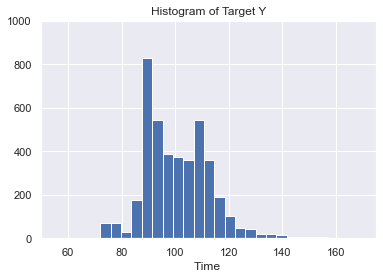

In [343]:
#plot showing Time of vehicle in testbench
plt.hist(Y.values, bins = 50)
plt.xlabel('Time ')
plt.title('Histogram of Target Y')
plt.grid(True)
plt.axis([50,175, 0,1000])
plt.show() 


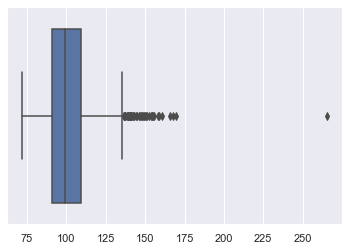

In [344]:
# to observe outliers in target variable
sns.boxplot(x=Y)

In [345]:
data.describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [346]:
data.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=376)

In [347]:
unhelpful_features = []
for i in range(len(data.columns)):
    if(len(np.unique(data.iloc[:,i])) == 1):
        unhelpful_features.append(data.columns[i]) 

In [348]:
len(unhelpful_features)

12

In [349]:
#drop columns with same values ie variance is zero

In [350]:
data.drop(unhelpful_features, axis=1, inplace= True)

In [351]:
data.shape

(4209, 364)

In [352]:
df_test.drop(unhelpful_features, axis=1, inplace= True)

In [353]:
df_test.shape

(4209, 364)

In [354]:
data.isnull().sum()

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 364, dtype: int64

In [355]:
data.isna().any()

X0      False
X1      False
X2      False
X3      False
X4      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 364, dtype: bool

In [356]:
data.isna().any().unique()

array([False])

In [357]:
#there are no NaN values

In [358]:
def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")

In [359]:
check_missing_values(data)


There are no missing values in the dataframe


In [360]:
check_missing_values(df_test)

There are no missing values in the dataframe


In [361]:
data.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X12',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=364)

In [362]:
data.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [363]:
#Columns that are categorical and muts be coverted into numerical data

In [364]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=356),
 dtype('O'): Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')}

In [365]:
data_catg = data.select_dtypes(include=[object])
data_catg

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [366]:
cat_lab=data_catg.columns

In [367]:
cat_lab

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [368]:
le= LabelEncoder()
for feature in cat_lab:
    data[feature] = le.fit_transform(data[feature])
    df_test[feature] = le.fit_transform(df_test[feature])

In [369]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [371]:
#to check if all categorical data is replaced with numerical data
data.X0.unique()

array([32, 20, 40,  9, 36, 43, 31, 29, 39, 35, 19, 27, 44, 45,  7,  8, 10,
       46, 37, 15, 12, 42,  5,  0, 26,  6, 25, 13, 24,  1, 22, 14, 30, 38,
       21, 18, 23, 41,  4, 16, 34, 33, 17, 11,  3, 28,  2])

In [372]:
data.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,29.760751,11.113566,17.306486,2.919696,2.997862,13.340223,6.807318,11.611309,0.013305,0.075077,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,13.738338,8.531001,10.899914,1.739912,0.073900,8.250832,2.916973,7.037888,0.114590,0.263547,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,8.000000,2.000000,3.000000,5.000000,6.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,13.000000,16.000000,2.000000,3.000000,15.000000,7.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,20.000000,25.000000,5.000000,3.000000,21.000000,9.000000,18.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,26.000000,43.000000,6.000000,3.000000,28.000000,11.000000,24.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [373]:
#apply scaling

In [374]:
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)
df_test_std = sc.transform(df_test)

In [375]:
data_std.shape

(4209, 364)

In [376]:
data_std

array([[ 0.16301209,  1.39348787, -0.02812155, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [ 0.16301209,  1.15902093,  0.15538793, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [-0.71055977,  1.51072134,  1.53170902, ..., -0.04081511,
        -0.02180363, -0.03778296],
       ...,
       [-1.58413164,  1.39348787,  1.89872798, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [-1.51133398,  0.924554  ,  0.70591637, ..., -0.04081511,
        -0.02180363, -0.03778296],
       [ 1.18217927,  0.924554  , -1.31268791, ..., -0.04081511,
        -0.02180363, -0.03778296]])

In [377]:
df_test_std.shape

(4209, 364)

4.Perform dimensionality reduction.

In [378]:
#apply PCA: select PCA components with 90% variance

In [379]:
pca = PCA(n_components= 0.9)

In [380]:
pca.fit(data_std)

PCA(n_components=0.9)

In [381]:
data_std_pca= pca.transform(data_std)

In [382]:
data_std_pca.shape

(4209, 120)

In [383]:
df_test_pca=pca.transform(df_test_std)

In [384]:
df_test_pca.shape

(4209, 120)

In [385]:
#Train model 

In [386]:
#Split train data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_std_pca, Y, test_size=0.3, random_state=123)

In [387]:
# checking with Linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [388]:
Y_pred=lr.predict(X_test)

In [389]:
#root mean squared error
print(sqrt(mean_squared_error(Y_test, Y_pred)))

8.902001778497604


In [390]:
print("R-squared :")
print(r2_score(Y_test, Y_pred))

R-squared :
0.4968249429852707


In [391]:
print('R2 Value/Coefficient of Determination: {}'.format(lr.score(X_test, Y_test)))

R2 Value/Coefficient of Determination: 0.4968249429852707


Training model using xgboost

In [392]:
#Training model using xgboost
import xgboost as xgb
d_train = xgb.DMatrix(X_train, label=Y_train)
d_test = xgb.DMatrix(X_test, label=Y_test)
num_rounds = 1000
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 5, "seed": 42, "silent": 1}
 
model_xgb1 = xgb.train(xgb_params, d_train, num_rounds, feval =r2_score)

[19:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [393]:
#for test data in train_test split
Y_pred_xgb = model_xgb1.predict(d_test)

mse = mean_squared_error(Y_test, Y_pred_xgb)
print("Mean Squared Error:")
print(mse)

print("Root Mean Squared Error:")
print(sqrt(mse))

print("R-squared :")
print(r2_score(Y_test, Y_pred_xgb))

Mean Squared Error:
74.39320696611647
Root Mean Squared Error:
8.625149677896406
R-squared :
0.5276357386390124


In [394]:
#for train data in train_test split
Y_pred_xgb_train = model_xgb1.predict(d_test)

mse = mean_squared_error(Y_test, Y_pred_xgb_train)
print("Mean Squared Error:")
print(mse)

print("Root Mean Squared Error:")
print(sqrt(mse))

print("R-squared :")
print(r2_score(Y_test, Y_pred_xgb_train))

Mean Squared Error:
74.39320696611647
Root Mean Squared Error:
8.625149677896406
R-squared :
0.5276357386390124


In [395]:
residual_xgb = Y_test['y']-Y_pred_xgb
residual_xgb
            

1259    -5.249521
1793    -6.272208
2720     0.882473
2024     2.759563
3578    -9.558264
          ...    
2362   -11.234662
3382    -7.809607
3404   -13.083197
1464    -8.809090
2316    -1.726344
Name: y, Length: 1263, dtype: float64

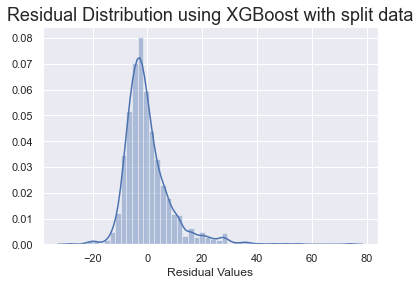

In [396]:

sns.set(color_codes=True)
sns.distplot(residual_xgb)
plt.xlabel("Residual Values")
plt.title("Residual Distribution using XGBoost with split data", fontsize =18)
plt.show()

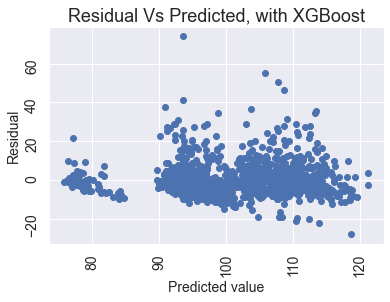

In [397]:
plt.scatter(Y_pred_xgb,residual_xgb)
plt.xlabel("Predicted value", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Residual Vs Predicted, with XGBoost", fontsize=18)
plt.xticks(fontsize= 14, rotation=90)
plt.yticks(fontsize= 14, rotation=90)
plt.show() 
 


In [398]:
# predicting Y values for Test.csv
df_test = xgb.DMatrix(df_test_pca)
df_test_pred= model_xgb1.predict(df_test)
df_test_pred

array([ 97.96427, 120.08058,  94.69131, ...,  94.38253, 111.33695,
        95.06997], dtype=float32)

In [399]:
#training the model along with watchlist
d_train2 = xgb.DMatrix(X_train, label=Y_train)
d_test2 = xgb.DMatrix(X_test, label=Y_test)

df_test2 = xgb.DMatrix(df_test_pca)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.01
params['max_depth'] = 5

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train2, 'train'), (d_test2, 'test')]

model_xgb2 = xgb.train(xgb_params, d_train2, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

[19:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:99.98943	test-rmse:99.93066	train-r2:-60.67117	test-r2:-62.40761
Multiple eval metrics have been passed: 'test-r2' will be used for early stopping.

Will train until test-r2 hasn't improved in 50 rounds.
[10]	train-rmse:90.55600	test-rmse:90.52151	train-r2:-49.58347	test-r2:-51.02920
[20]	train-rmse:82.03136	test-rmse:82.00564	train-r2:-40.50821	test-r2:-41.70033
[30]	train-rmse:74.32651	test-rmse:74.31345	train-r2:-33.0

In [400]:
#predicting for Test.csv
df_test_pred2= model_xgb2.predict(df_test2)
df_test_pred2

array([ 96.64018 , 119.529594,  93.79932 , ...,  94.35772 , 110.796906,
        95.48889 ], dtype=float32)

In [401]:
#creating a new dataframe with ID and predicted values for test.csv
Test_df = pd.DataFrame()
Test_df['ID'] = df_test_ID
Test_df['y'] = df_test_pred2

Test_df.head()

,ID,y
0,1,96.640182
1,2,119.529594
2,3,93.799316
3,4,85.370972
4,5,104.726440


In [402]:
Test_df.shape

(4209, 2)